In [1]:
from keras.datasets import cifar10
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
base_model = VGG19(include_top=False, weights='imagenet',pooling='avg',classes=10)

80134624/80134624 [==============================] - 5s 0us/step


In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.UpSampling2D())
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 123s 71ms/step - loss: 1.2265 - accuracy: 0.5858 - val_loss: 0.5423 - val_accuracy: 0.8304
Epoch 2/5
1563/1563 [==============================] - 107s 68ms/step - loss: 0.5411 - accuracy: 0.8364 - val_loss: 0.4204 - val_accuracy: 0.8688
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 0.3702 - accuracy: 0.8895 - val_loss: 0.3488 - val_accuracy: 0.8883
Epoch 4/5
1563/1563 [==============================] - 107s 68ms/step - loss: 0.2729 - accuracy: 0.9183 - val_loss: 0.3364 - val_accuracy: 0.8929
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 0.2026 - accuracy: 0.9384 - val_loss: 0.3429 - val_accuracy: 0.9033


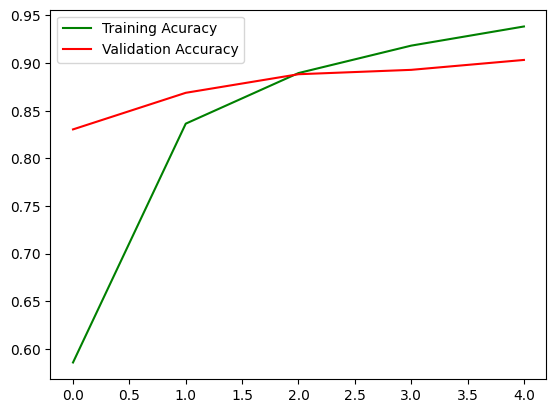

In [9]:
from matplotlib import pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

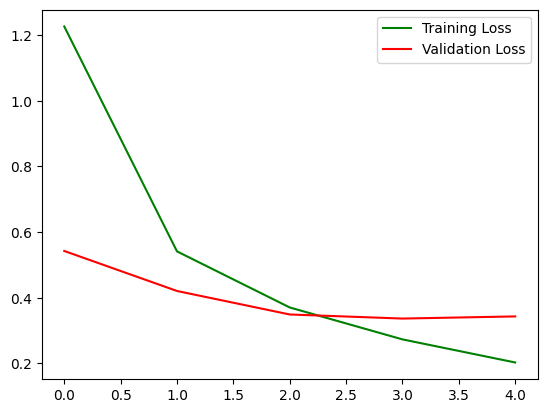

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.3429 - accuracy: 0.9033


[0.3429001271724701, 0.9032999873161316]

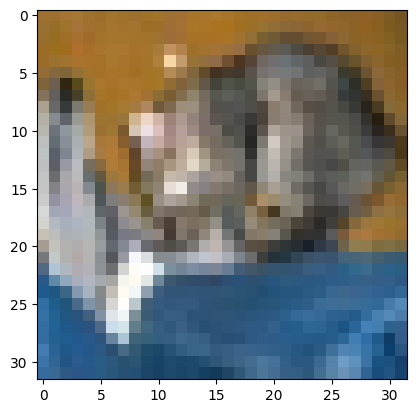

In [12]:
plt.imshow(x_test[0])

In [13]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
model.save('cifar10_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
loaded_model = tf.keras.models.load_model('cifar10_vgg19.h5')

In [18]:
predictions = loaded_model.predict(x_test)

313/313 [==============================] - 5s 16ms/step


In [20]:
import numpy as np

accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Test accuracy: 90.33%
